<a href="https://colab.research.google.com/github/Angelamr13/mast/blob/main/MD004AngelaMartinezRodriguezAC03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("corrplot")
install.packages('gridExtra')
install.packages('nortest')
install.packages("olsrr")
install.packages("GGally")
install.packages("caret")
install.packages("lmtest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing 

In [15]:
library(dplyr)
library(MASS)
library(class)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(GGally)
library(nortest)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)
library("readxl")

**1. VISUALIZACIÓN Y FAMILIARIZACIÓN CON EL DATASET.**

In [16]:
# Por defecto coma (,) como separador y punto (.) como separador decimal
 datos_boston <- read.csv("/content/20230119_DatosBoston.csv", # Nombre del archivo o ruta completa del archivo
         header = TRUE,        # Leer el encabezado (TRUE) o no (FALSE)
         sep = ";",            # Separador de los valores
         quote = "\"",         # Caracter de citaciones
         dec = ".",            # Punto decimal
         fill = TRUE,          # Rellenar celdas vacías (TRUE) o no (FALSE)
         comment.char = "",    # Carácter de los comentarios o cadenas vacías
         encoding = "unknown", # Codificación del archivo
         )                  # Argumentos adicionales


In [17]:
str(datos_boston) #Esta función nos permite ver las variables del archivo csv

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [18]:

head(datos_boston)#de forma predefinida retorna las primeras 6 observations
tail(datos_boston)#de forma predefinida retorna las últimas 6 observations


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,24.982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,24.786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,22.875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,21.675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,23.889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.505,1,273,21.0,396.90,7.88,11.9


In [19]:

# Devuelve el número de NAs que presenta la tabla
sum(is.na(datos_boston))
# Devuelve el % de valores perdidos
mean(is.na(datos_boston))

[1] 0

[1] 0

In [20]:
summary(datos_boston) #Esta función nos devuelve un resumen del conjunto de datos del archivo csv

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

**Visualización usando Histograma y BoxPlot**

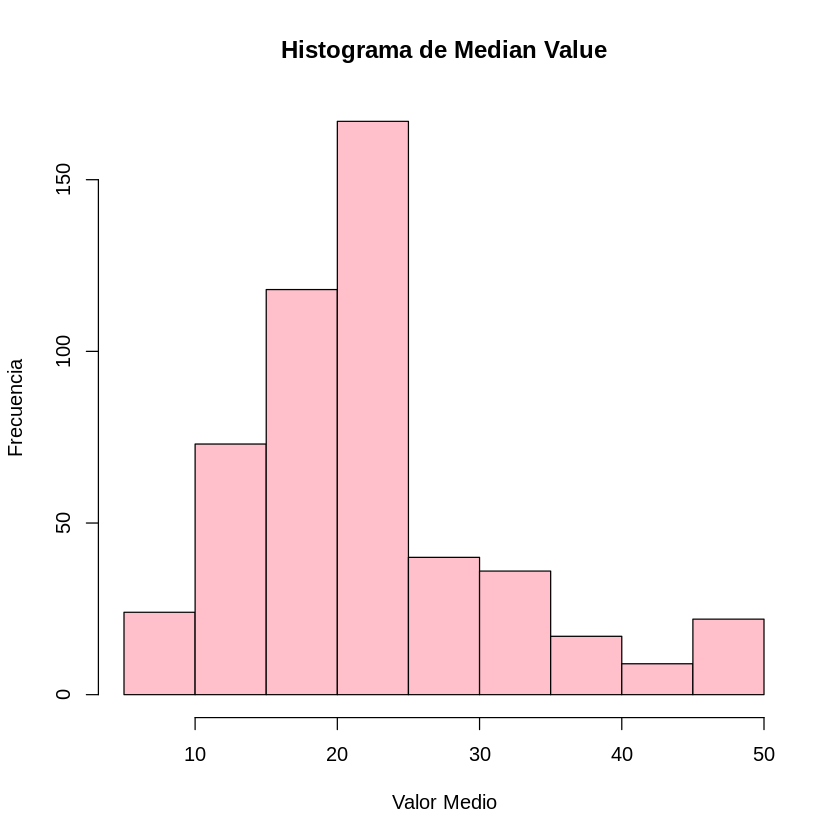

In [21]:
hist(datos_boston$median_value,
     main = "Histograma de Median Value",  # Título del histograma
     xlab = "Valor Medio",  # Etiqueta del eje x
     ylab = "Frecuencia",   # Etiqueta del eje y
     col = "pink",          # Color de las barras del histograma
     border = "black",      # Color del borde de las barras
     xlim = c(min(datos_boston$median_value), max(datos_boston$median_value)),  # Límites del eje x
     breaks = 10)           # Número de barras

En el histograma del valor medio de la vivienda, podemos ver que es un histograma sesgado a la derecha, es decir, de simetría positiva. Con estos resultados podemos interpretar que la mayoría de los precios de las viviendas son bajos aunque un número pequeño de viviendas tienden a tener un precio más elevado.
A continuación, realizaremos el histograma para diferentes variables.

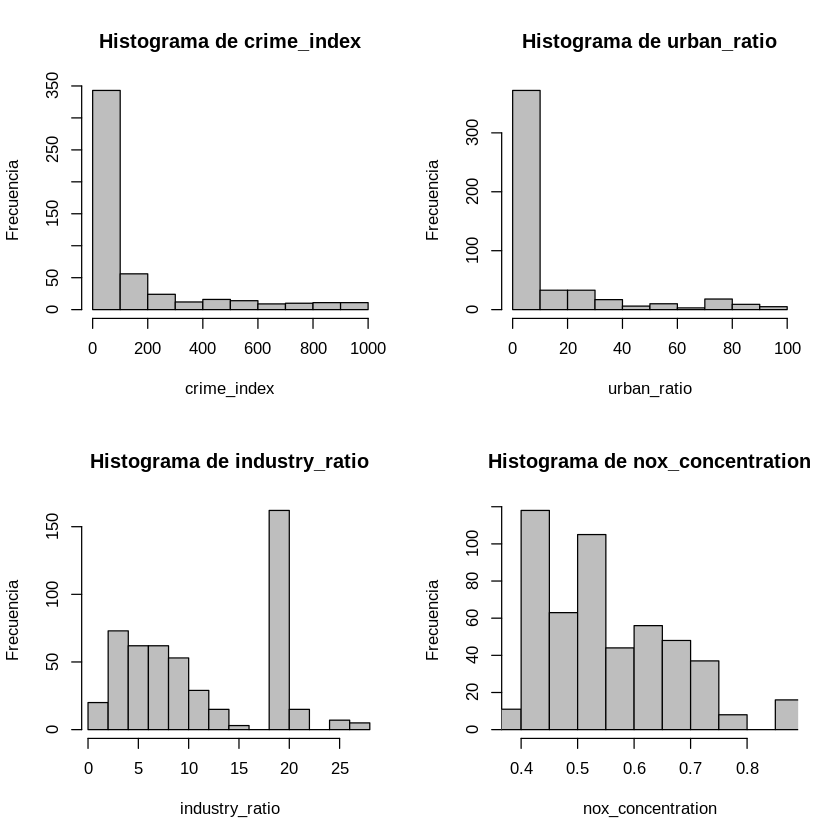

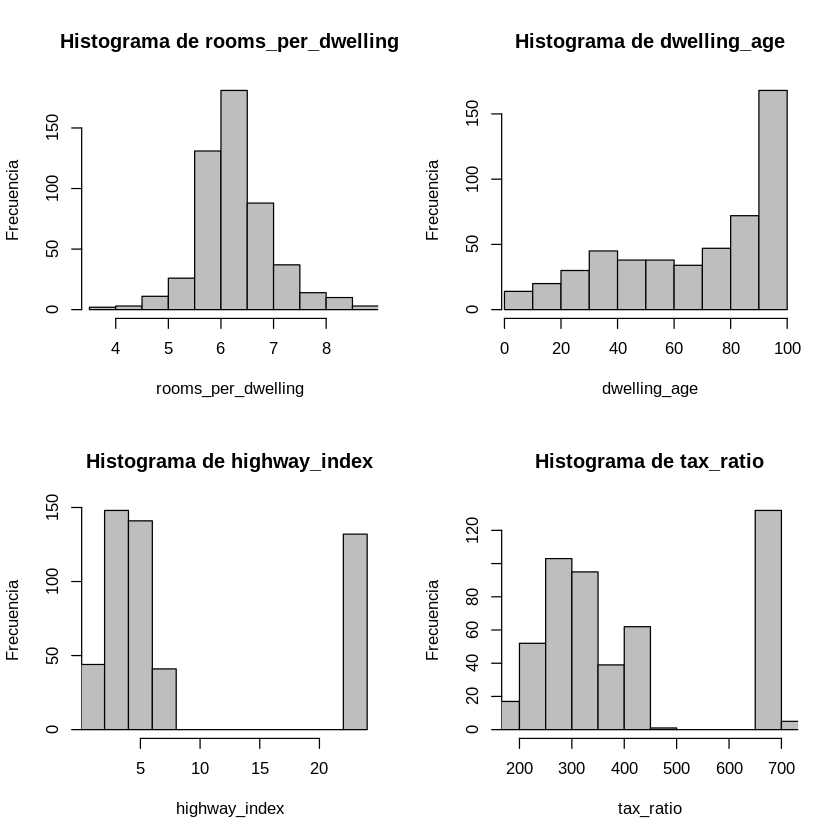

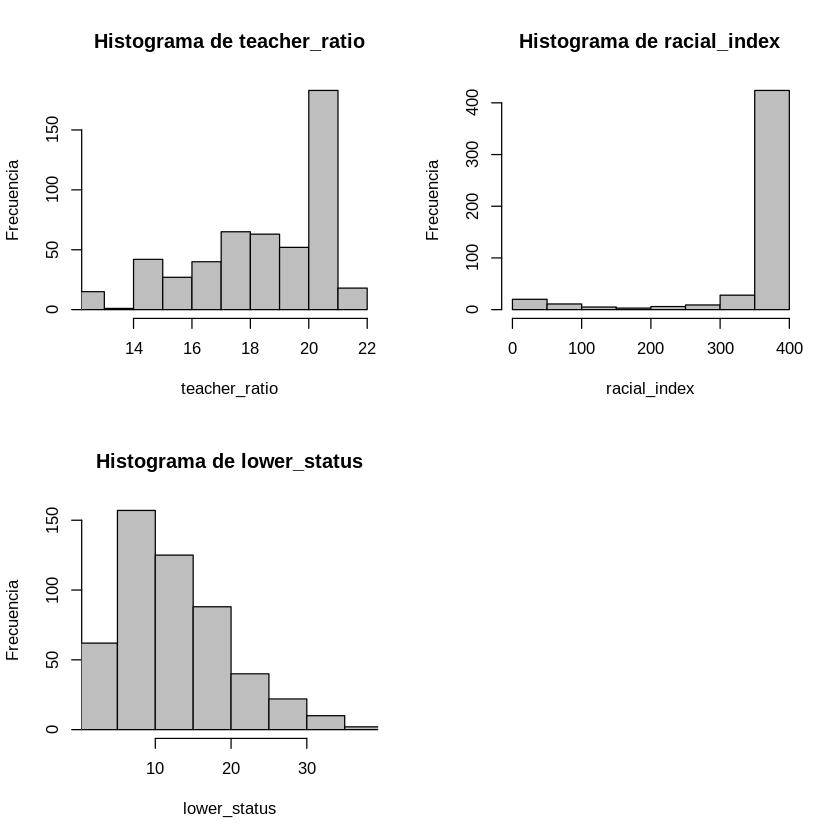

In [22]:
par(mfrow = c(2, 2)) # Nos permite ver los gráficos de 2 en 2
hist(datos_boston$crime_index,
     main = "Histograma de crime_index", xlab = "crime_index", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$crime_index), max(datos_boston$crime_index)), breaks = 10)
hist(datos_boston$urban_ratio,
     main = "Histograma de urban_ratio", xlab = "urban_ratio", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$urban_ratio), max(datos_boston$urban_ratio)), breaks = 10)
hist(datos_boston$industry_ratio,
     main = "Histograma de industry_ratio", xlab = "industry_ratio", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$industry_ratio), max(datos_boston$industry_ratio)), breaks = 10)
hist(datos_boston$nox_concentration,
     main = "Histograma de nox_concentration", xlab = "nox_concentration", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$nox_concentration), max(datos_boston$nox_concentration)), breaks = 10)
hist(datos_boston$rooms_per_dwelling,
     main = "Histograma de rooms_per_dwelling", xlab = "rooms_per_dwelling", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$rooms_per_dwelling), max(datos_boston$rooms_per_dwelling)), breaks = 10)
hist(datos_boston$dwelling_age,
     main = "Histograma de dwelling_age", xlab = "dwelling_age", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$dwelling_age), max(datos_boston$dwelling_age)), breaks = 10)
hist(datos_boston$highway_index,
     main = "Histograma de highway_index", xlab = "highway_index", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$highway_index), max(datos_boston$highway_index)), breaks = 10)
hist(datos_boston$tax_ratio,
     main = "Histograma de tax_ratio", xlab = "tax_ratio", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$tax_ratio), max(datos_boston$tax_ratio)), breaks = 10)
hist(datos_boston$teacher_ratio,
     main = "Histograma de teacher_ratio", xlab = "teacher_ratio", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$teacher_ratio), max(datos_boston$teacher_ratio)), breaks = 10)
hist(datos_boston$racial_index,
     main = "Histograma de racial_index", xlab = "racial_index", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$racial_index), max(datos_boston$racial_index)), breaks = 10)
hist(datos_boston$lower_status,
     main = "Histograma de lower_status", xlab = "lower_status", ylab = "Frecuencia",col = "grey",border = "black",
     xlim = c(min(datos_boston$lower_status), max(datos_boston$lower_status)), breaks = 10)

Tras los histogramas representados podemos llegar a las siguientes conclusiones de cada una de las variables:

- En el caso de *crime_index* y *urban_ratio*, vemos que tienen unos valores muy bajos, por lo tanto, tenemos un índice de criminalidad bajo y un bajo ratio de zona urbana residencial sobre el total.
- Para la variable *rooms_per_dwelling*, tenemos una distribuación normal, por lo tanto, las viviendas cuentan con un número habitual de habitaciones.
- Las variables *nox_concentration* y *lower_status*, son variables con histogramas sesgados a la derecha, esto quiere decir que tienen un sesgo positivo, en el caso de *nox_concentration*, nos indica que el índice de concentración de óxido nitroso en la zona es bajo y en referencia a *lower_status*, nos indica que hay un número bajo de población que pertenezca a la clase baja.
- Las variables *dwelling_age*, *racial_index* y *teacher_ratio*, estan sesgadas a la izquierda, esto nos muestra un sesgo negativo, el cual nos indica que la edad media de las viviendas es elevada, igual que el índice de proporción de población no caucásica y el ratio de alumno por profesor.
- El resto de las variables, parecen ser bimodales, esto es debido a que tanto *highway_index* como *industry_ratio*, se refiere a ratios por zona o distancia, al contar también con el centro de la ciudad, habrán zonas que estén muy lejos omuy cerca de las entradas a las autopistas y exactamente lo mismo para la cercanía a zonas industriales.
- Para la variable *tax_value*, tenemos también una distribuciín bimodal, podría indicar que hay dos grupos claramente distintos en el conjunto de datos. Por ejemplo, puede haber dos grupos de propiedades con diferentes niveles de tasación o impuestos, lo que podría deberse a diferencias en la ubicación geográfica, el tipo de propiedad o alguna otra característica relevante.


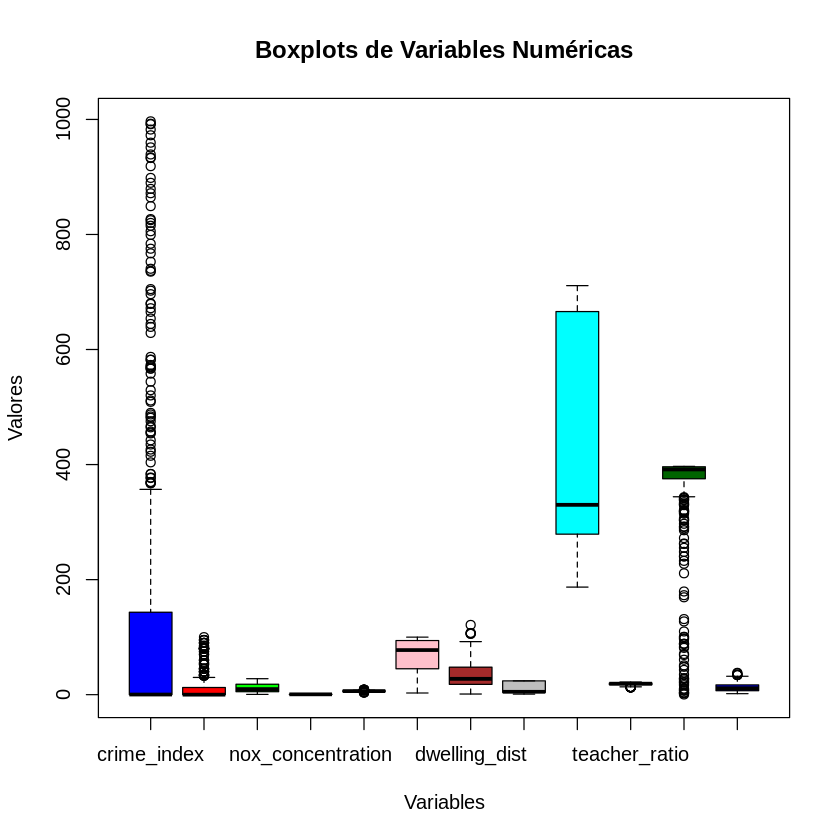

In [23]:
# Hacemos un boxplot para cada una de las columnas numéricas, exceptuando median_value y c_river_variable
# Crea un boxplot para cada variable numérica excepto median_value y c_river_variable
boxplot(datos_boston[, -c(4, 14)],
        col = c("blue", "red", "green", "purple", "orange", "pink", "brown", "gray", "cyan", "magenta", "darkgreen"),
        main = "Boxplots de Variables Numéricas",
        xlab = "Variables",
        ylab = "Valores")


Podemos ver tras realizar el boxplot para cada una de las variables, que tenemos un ratio de alumno por profesor muy alto y que el índice de tasas cubre un amplio espectro.

**2. ANÁLISIS DE CORRELACIÓN**

In [24]:
boston4cov<-subset(datos_boston, select=-c(c_river_variable))


In [25]:
cov(boston4cov)

,crime_index,urban_ratio,industry_ratio,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
crime_index,60710.86355,-1498.577125,908.4438893,16.66303230,-25.29762888,2866.529944,-1950.006014,1646.3007309,30196.66016,175.69659470,-7386.210393,664.7997212,-730.5715692
urban_ratio,-1498.57712,543.936814,-85.4126481,-1.39614820,5.11251341,-373.901548,265.050704,-63.3486949,-1236.45374,-19.77657066,373.721402,-68.7830369,77.3151755
industry_ratio,908.44389,-85.412648,47.0644425,0.60707369,-1.88795657,124.513903,-87.404431,35.5499714,833.36029,5.69210400,-223.579756,29.5802703,-30.5208228
nox_concentration,16.66303,-1.396148,0.6070737,0.01342764,-0.02460345,2.385927,-1.633434,0.6169295,13.04629,0.04739732,-4.020570,0.4889462,-0.4554124
rooms_per_dwelling,-25.29763,5.112513,-1.8879566,-0.02460345,0.49367085,-4.751929,2.349475,-1.2838146,-34.58345,-0.54076322,8.215006,-3.0797414,4.4934459
dwelling_age,2866.52994,-373.901548,124.5139031,2.38592720,-4.75192919,792.358399,-414.578566,111.7708465,2402.69012,15.93692134,-702.940328,121.0777246,-97.5890166
dwelling_dist,-1950.00601,265.050704,-87.4044314,-1.63343416,2.34947500,-414.578566,524.974291,-75.3642818,-1579.03167,-6.81394298,470.190535,-69.8299722,37.5297156
highway_index,1646.30073,-63.348695,35.5499714,0.61692945,-1.28381457,111.770846,-75.364282,75.8163660,1335.75658,8.76071616,-353.276219,30.3854424,-30.5612280
tax_ratio,30196.66016,-1236.453735,833.3602902,13.04628553,-34.58344778,2402.690122,-1579.031669,1335.7565765,28404.75949,168.15314053,-6797.911215,654.7145196,-726.2557164
teacher_ratio,175.69659,-19.776571,5.6921040,0.04739732,-0.54076322,15.936921,-6.813943,8.7607162,168.15314,4.68698912,-35.059527,5.7827286,-10.1106571


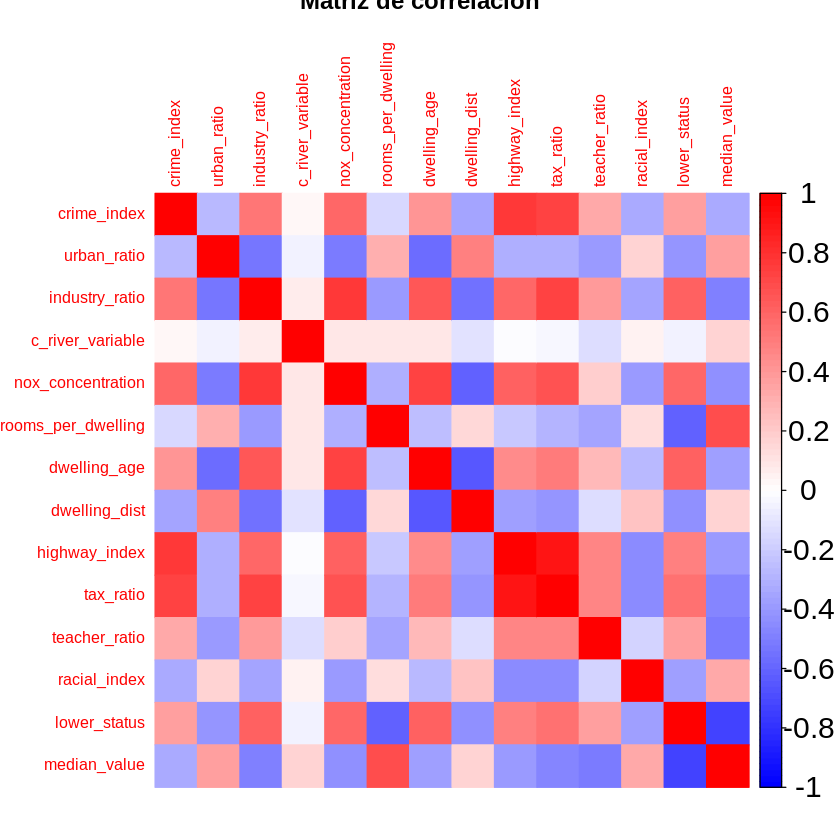

In [26]:
# Cálculo de la matriz de correlación
cor_matrix <- cor(datos_boston)
# Visualización de la matriz de correlación como un mapa de calor
corrplot(cor_matrix, main = "Matriz de correlación", method = "color", col = colorRampPalette(c("blue", "white", "red"))(100),
        tl.cex = 0.8,  # Tamaño de las etiquetas
         cl.cex = 1.5)  # Tamaño de los cuadrados


El mapa de correlación nos indica la intensidad de relación entre cada una de las variables a estudiar. En este caso, mientras más correlación haya entre variables el color de este mapa tenderá a ser rojo, mientras que cuando haya menos correlación será azul. Como podemos observar, por lo que respecta a la variable "median_value", vemos que tiene una fuerte correlación con la variable "rooms_per_dwelling", esto nos lleva a la concusión de que el valor medio de vivienda es directamente proporcional al número de habitaciones medio por vivienda.

**3. ANÁLISIS DE ANOVA.**

In [27]:
datos_cor <- data.frame(datos_boston$crime_index,
datos_boston$urban_ratio,
datos_boston$industry_ratio,
datos_boston$c_river_variable,
datos_boston$nox_concentration,
datos_boston$rooms_per_dwelling,
datos_boston$dwelling_age,
datos_boston$dwelling_dist,
datos_boston$highway_ind,
datos_boston$teacher_ratio,
datos_boston$racial_index,
datos_boston$lower_status,
datos_boston$median_value)
matrix_cor <- cor(datos_cor) #Guardamos la tabla de correlación en el objeto "matrix_cor"
round(matrix_cor, 2) #Redondeamos los valores en la matriz de correlación a 2 decimales, para ver más claramente las correlaciones

,datos_boston.crime_index,datos_boston.urban_ratio,datos_boston.industry_ratio,datos_boston.c_river_variable,datos_boston.nox_concentration,datos_boston.rooms_per_dwelling,datos_boston.dwelling_age,datos_boston.dwelling_dist,datos_boston.highway_ind,datos_boston.teacher_ratio,datos_boston.racial_index,datos_boston.lower_status,datos_boston.median_value
datos_boston.crime_index,1.00,-0.26,0.54,0.03,0.58,-0.15,0.41,-0.35,0.77,0.33,-0.33,0.38,-0.32
datos_boston.urban_ratio,-0.26,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.50,-0.31,-0.39,0.18,-0.41,0.36
datos_boston.industry_ratio,0.54,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.56,0.60,0.38,-0.36,0.60,-0.48
datos_boston.c_river_variable,0.03,-0.04,0.06,1.00,0.09,0.09,0.09,-0.11,-0.01,-0.12,0.05,-0.05,0.18
datos_boston.nox_concentration,0.58,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.62,0.61,0.19,-0.38,0.59,-0.43
datos_boston.rooms_per_dwelling,-0.15,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.15,-0.21,-0.36,0.13,-0.61,0.70
datos_boston.dwelling_age,0.41,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.64,0.46,0.26,-0.27,0.60,-0.38
datos_boston.dwelling_dist,-0.35,0.50,-0.56,-0.11,-0.62,0.15,-0.64,1.00,-0.38,-0.14,0.22,-0.43,0.18
datos_boston.highway_ind,0.77,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.38,1.00,0.46,-0.44,0.49,-0.38
datos_boston.teacher_ratio,0.33,-0.39,0.38,-0.12,0.19,-0.36,0.26,-0.14,0.46,1.00,-0.18,0.37,-0.51


In [28]:
pca <- princomp(datos_cor, cor = TRUE) #Realizamos un análisis de componentes principales (PCA) en los datos contenidos en "datos_cor"
summary(pca) #Resumen de los resultados
cat("La desviación estándar del componente principal es:\n")
sd(predict(pca)[, 1]) #Calculamos la desviación estándar del primer componente principal
cat("La varianza del primer componente es:\n")
var(predict(pca)[, 1]) #Calculamos la varianza del primer componente principal

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.4024994 1.2920438 1.10388873 0.93537034 0.92959214
Proportion of Variance 0.4440002 0.1284136 0.09373618 0.06730136 0.06647243
Cumulative Proportion  0.4440002 0.5724139 0.66615005 0.73345141 0.79992384
                           Comp.6     Comp.7     Comp.8    Comp.9    Comp.10
Standard deviation     0.81845310 0.65219684 0.61629637 0.5766155 0.48880076
Proportion of Variance 0.05152811 0.03272006 0.02921702 0.0255758 0.01837894
Cumulative Proportion  0.85145195 0.88417201 0.91338903 0.9389648 0.95734377
                          Comp.11    Comp.12    Comp.13
Standard deviation     0.47372102 0.43515146 0.37518346
Proportion of Variance 0.01726243 0.01456591 0.01082789
Cumulative Proportion  0.97460620 0.98917211 1.00000000

La desviación estándar del componente principal es:


[1] 2.404877

La varianza del primer componente es:


[1] 5.783433

In [29]:
loadings(pca) # Obtenemos las cargas factoriales de las variables originales en cada componente principal


Loadings:
                                Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
datos_boston.crime_index         0.276  0.163  0.467  0.204         0.354
datos_boston.urban_ratio        -0.270         0.343        -0.399  0.386
datos_boston.industry_ratio      0.353  0.102                            
datos_boston.c_river_variable           0.396 -0.228  0.660 -0.552 -0.199
datos_boston.nox_concentration   0.349  0.235        -0.146         0.190
datos_boston.rooms_per_dwelling -0.222  0.469  0.281         0.264 -0.191
datos_boston.dwelling_age        0.323  0.223 -0.229 -0.145  0.102       
datos_boston.dwelling_dist      -0.266 -0.345  0.248  0.209 -0.163       
datos_boston.highway_ind         0.310         0.467  0.168         0.123
datos_boston.teacher_ratio       0.220 -0.316  0.154  0.484  0.422 -0.334
datos_boston.racial_index       -0.203        -0.388  0.378  0.383  0.685
datos_boston.lower_status        0.335 -0.212 -0.141 -0.117 -0.246  0.110
datos_boston.median_value  

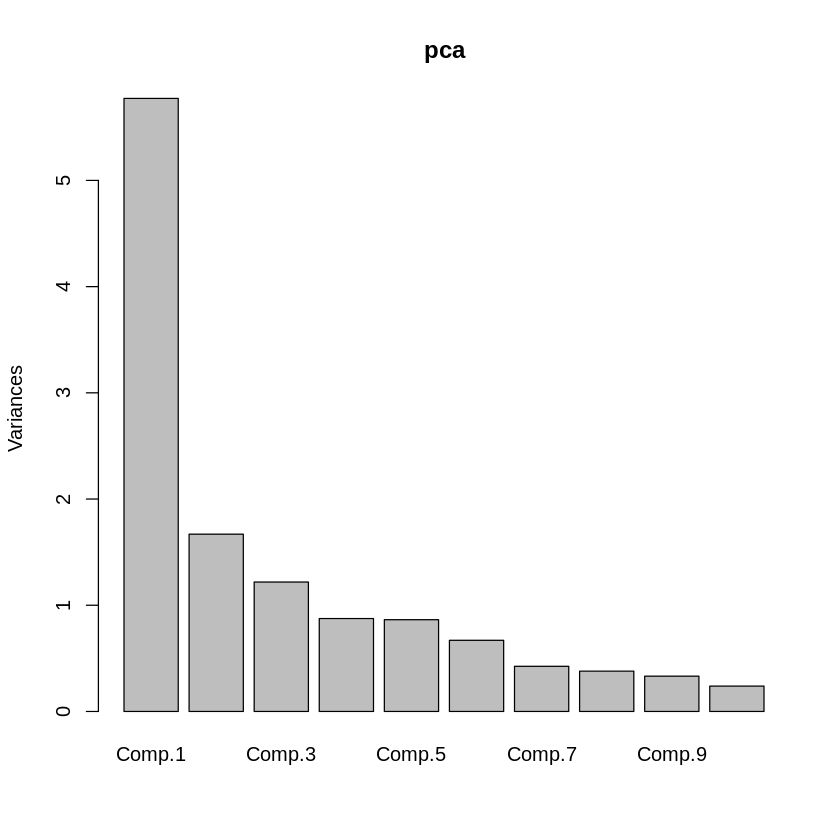

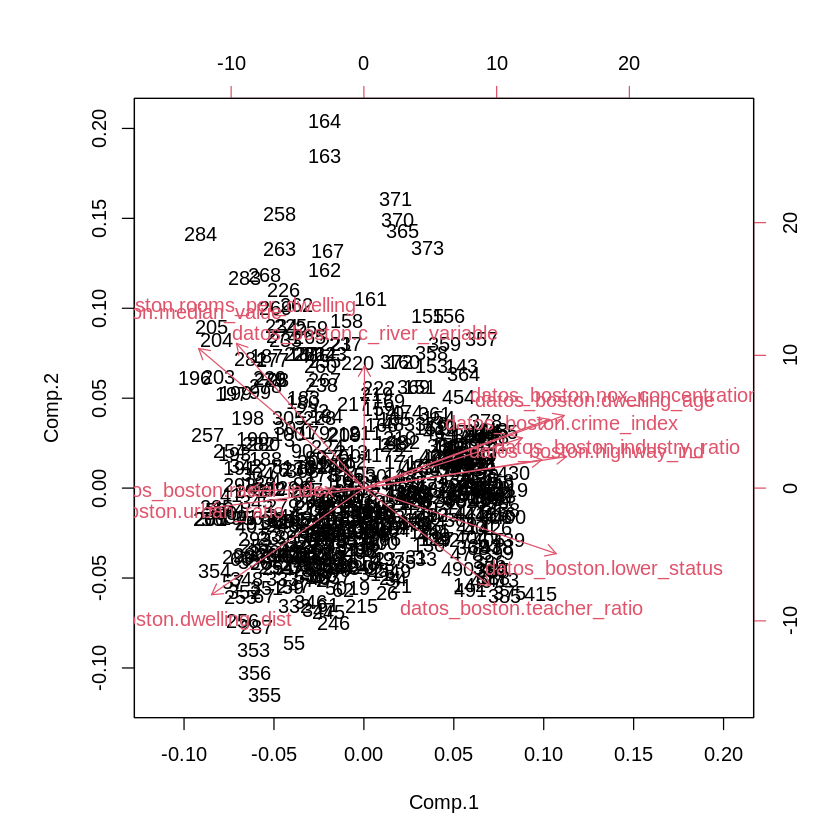

In [30]:
plot(pca)
biplot(pca)

El número total de componentes es 10.
Como hemos visto en el cálculo del pca, el componente 1 agrupa un 44,40% de variación, y las variables que destacan son : industry_ratio, nox_concentration y lower_status. Esto nos indica que estas variables son las que más influyen en la variación de la componente 1.
Para el componente 2, vemos que agrupa un 12.81% de la variación y los valores absolutos más elevados son : rooms_per_dwelling, dwelling_dist, y median_value.

**ANÁLISIS DE ANOVA**

                    Df Sum Sq Mean Sq F value Pr(>F)    
rooms_per_dwelling   1  20654   20654   471.8 <2e-16 ***
Residuals          504  22062      44                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


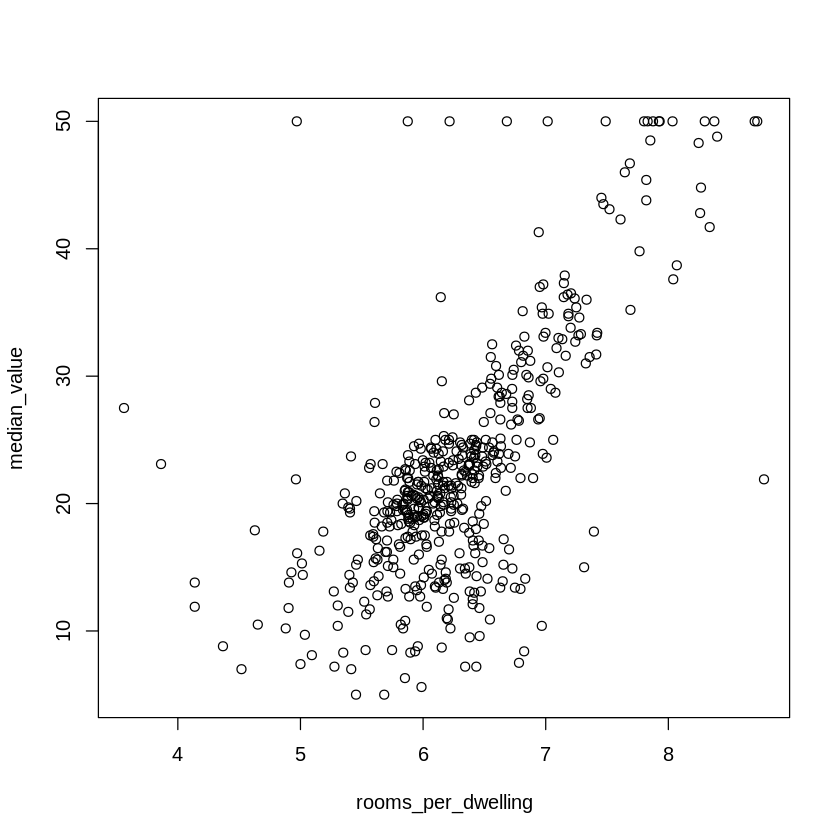

In [31]:
modelo_anova <- aov(median_value ~ rooms_per_dwelling, data = datos_boston)
resultados_anova <- summary(modelo_anova)
print(resultados_anova)
plot(median_value~rooms_per_dwelling, datos_boston)


En el análisis, podemos observar una diferencia entre los grupos definidos por la variable "rooms_per_dwelling".
Tras realizar el análisis de ANOVA, obtenemos un F value de 471,8 y debido al valor de p<0.001, consideramos que es muy significativo.
Los resultados del análisis ANOVA nos indican que el número de habitaciones por vivienda, afecta directamente en la variable median_value.
A través del gráfico podemos ver que estas dos variables están relacionadas, a continuación comprobaremos si existe linealidad entre la variable "median_value" y el resto de variables implicadas.


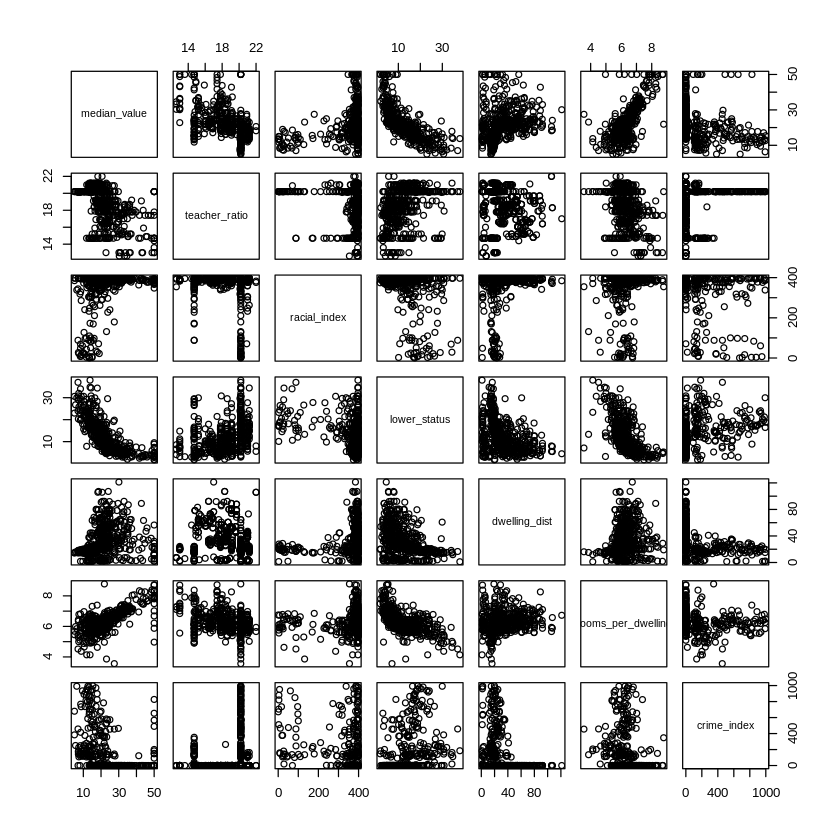

In [32]:
pairs(~ median_value + teacher_ratio + racial_index + lower_status + dwelling_dist + rooms_per_dwelling + crime_index, data = datos_boston)

Tras visualizar estos gráficos, podemos observar que la relación entre la variable "median_value" y las variables "lower_status" y "rooms_per_dwelling" es claramente lineal, mientras que la relación con "crime_index" o "dwelling_dist", no es lineal.

**4. DESARROLLO Y JUSTIFICACIÓN DE LAS VARIABLES.**

**Regresión lineal simple**


Call:
lm(formula = median_value ~ rooms_per_dwelling, data = datos_boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -34.671      2.650  -13.08   <2e-16 ***
rooms_per_dwelling    9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


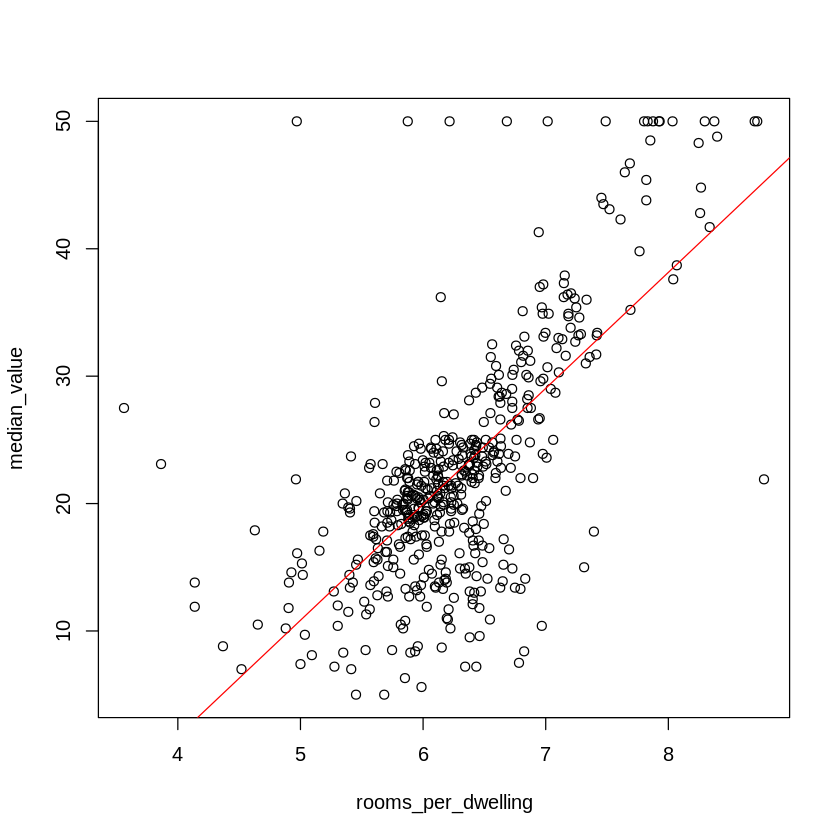

In [33]:
reglin_s=lm(median_value~rooms_per_dwelling,data=datos_boston)
summary(reglin_s)
plot(median_value~rooms_per_dwelling, datos_boston)
abline(reglin_s,col="red")


,2.5 %,97.5 %
(Intercept),-39.876641,-29.464601
rooms_per_dwelling,8.278855,9.925363


,fit,lwr,upr
1,56.35047,53.23767,59.46327
2,147.37156,136.06555,158.67756
3,238.39265,218.86033,257.92497


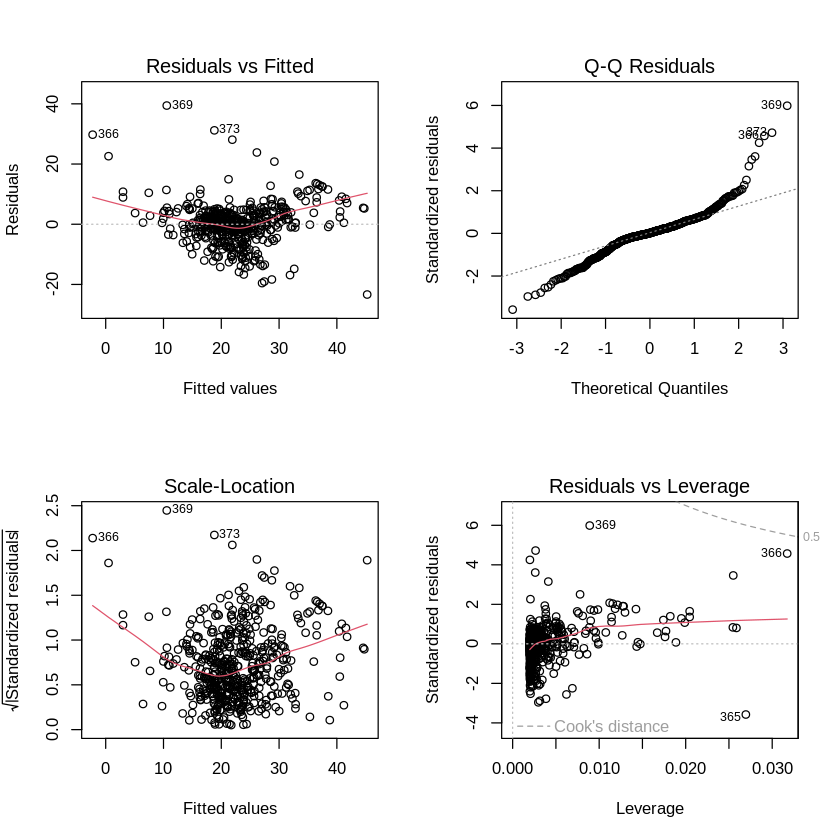

In [35]:
confint(reglin_s)
predict(reglin_s,data.frame(rooms_per_dwelling=c(10,20,30)),interval="confidence")
par(mfrow=c(2,2))
plot(reglin_s)


**Regresión lineal múltiple**

In [38]:
reglin_m=lm(median_value~ rooms_per_dwelling +dwelling_age+lower_status,data=datos_boston)
summary(reglin_m)


Call:
lm(formula = median_value ~ rooms_per_dwelling + dwelling_age + 
    lower_status, data = datos_boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.210  -3.467  -1.053   1.957  27.500 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.175311   3.181924  -0.369    0.712    
rooms_per_dwelling  5.019133   0.454306  11.048   <2e-16 ***
dwelling_age        0.009091   0.011215   0.811    0.418    
lower_status       -0.668513   0.054357 -12.298   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.542 on 502 degrees of freedom
Multiple R-squared:  0.639,	Adjusted R-squared:  0.6369 
F-statistic: 296.2 on 3 and 502 DF,  p-value: < 2.2e-16


Después de haber realizado el modelo de regresión lineal múltiple, podemos ver claramente algunos resultados significativos para nuestro análisis:
- El número de habitaciones medio por vivienda(rooms_per_dwelling), afecta de manera positiva al valor medio de la vivienda con un coeficiente estimado positivo (5,019) y un p-value muy pequeño(<2e-16), podemos afirmar que esta variable se asocia positivamente con un aumento en el valor medio de las viviendas.
- El coeficiente estimado de la edad media de la vivienda (dwelling_age) es cercano a cero (0.009091) y no es significativo (p-valor alto). Esto nos indica que la edad media de las viviendas no parece tener un efecto significativo en el valor medio de las viviendas.
-  El coeficiente estimado del porcentaje de población de "clase-baja"(lower_status) es negativo(-0.668513) y altamente significativo, ya que cuenta con un p-value muy pequeño. Esto nos indica que un aumento en el porcentaje de población de clase baja, se asocia negativamente con el valor medio de las viviendas, lo que nos revela que las áreas con un alto porcentaje de población de clase baja, tiende a tener valores más bajos.
- El estadístico F es 296.2 con un p-valor muy pequeño (< 2.2e-16), lo que indica que el modelo en su conjunto es estadísticamente significativo. Esto significa que al menos una de las variables predictoras tiene un efecto significativo en el valor medio de las viviendas.

En resumen, según estos resultados, las variables rooms_per_dwelling y lower_status son factores importantes en la determinación del valor medio de las viviendas en Boston. Un mayor número medio de habitaciones por vivienda está asociado con un aumento en el valor medio de las viviendas, mientras que un mayor porcentaje de población de clase baja está asociado con un valor medio de vivienda más bajo. La "edad" media de las viviendas no parece tener un efecto significativo en el valor medio de las viviendas en este modelo.


Call:
lm(formula = median_value ~ ., data = datos_boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5883  -2.7818  -0.5727   1.7557  27.5082 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         25.836279   5.084194   5.082 5.32e-07 ***
crime_index         -0.003441   0.001433  -2.401 0.016729 *  
urban_ratio          0.016433   0.013195   1.245 0.213586    
industry_ratio       0.092119   0.062591   1.472 0.141726    
c_river_variable     2.775802   0.889805   3.120 0.001917 ** 
nox_concentration  -10.026540   3.874316  -2.588 0.009940 ** 
rooms_per_dwelling   4.079304   0.430305   9.480  < 2e-16 ***
dwelling_age         0.012010   0.013497   0.890 0.373999    
dwelling_dist       -0.059688   0.013378  -4.462 1.01e-05 ***
highway_index        0.320676   0.070722   4.534 7.27e-06 ***
tax_ratio           -0.012069   0.003886  -3.106 0.002006 ** 
teacher_ratio       -0.962855   0.135223  -7.121 3.83e-12 ***
racial_index    

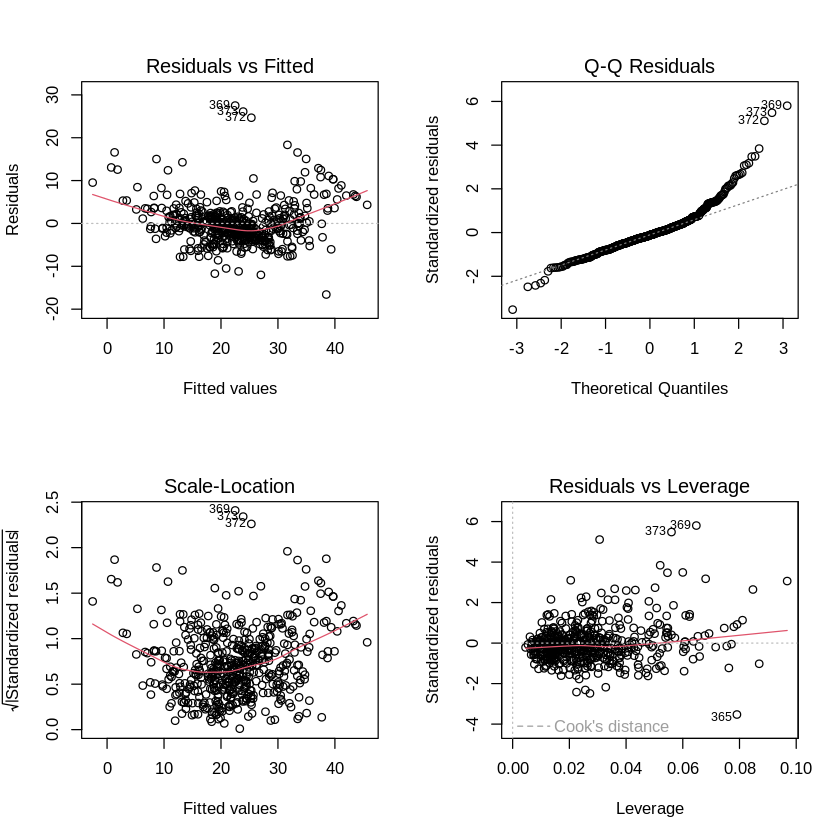

In [51]:
reglin_m2=lm(median_value~.,datos_boston)
summary(reglin_m2)
par(mfrow=c(2,2))
plot(reglin_m2)

Los coeficientes estimados nos muestran relaciones importantes entre las variables predictoras y la variable de respuesta "median_value".
- Podemos observar un coeficiente estimado negativo en referencia a la variable "crime_index". Esto quiere decir que cuando el índice de criminalidad aumenta, el valor medio de la vivienda disminuye, hay una relación inversamente proporcional.
- La relación del valor medio de vivienda con la concentración de nox, también es altamente negativo.
- La variable "teacher ratio" también se puede considerar significativa aunque no tanto como las vistas anteriormente, mientras el ratio de alumno por profesor sea menor, el valor medio de la vivienda será mayor.

En general, con el estudio realizado anteriormente ya hemos visto cuáles son las variables que más afectan en el valor medio de la vivienda.


In [52]:
lm(formula = median_value ~ crime_index + urban_ratio + c_river_variable +
 nox_concentration + rooms_per_dwelling + dwelling_dist +
 highway_index + tax_ratio + teacher_ratio + racial_index +
 lower_status, data = datos_boston)



Call:
lm(formula = median_value ~ crime_index + urban_ratio + c_river_variable + 
    nox_concentration + rooms_per_dwelling + dwelling_dist + 
    highway_index + tax_ratio + teacher_ratio + racial_index + 
    lower_status, data = datos_boston)

Coefficients:
       (Intercept)         crime_index         urban_ratio    c_river_variable  
         24.324392           -0.003357            0.010027            2.949837  
 nox_concentration  rooms_per_dwelling       dwelling_dist       highway_index  
         -7.015544            4.118995           -0.065309            0.285123  
         tax_ratio       teacher_ratio        racial_index        lower_status  
         -0.009370           -0.928090            0.010655           -0.554990  


**Términos no lineales**

In [59]:
reglin_m3=lm(median_value~rooms_per_dwelling +I(rooms_per_dwelling^2),datos_boston)
summary(reglin_m3)


Call:
lm(formula = median_value ~ rooms_per_dwelling + I(rooms_per_dwelling^2), 
    data = datos_boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.769  -2.752   0.619   3.003  35.464 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              66.0588    12.1040   5.458 7.59e-08 ***
rooms_per_dwelling      -22.6433     3.7542  -6.031 3.15e-09 ***
I(rooms_per_dwelling^2)   2.4701     0.2905   8.502  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.193 on 503 degrees of freedom
Multiple R-squared:  0.5484,	Adjusted R-squared:  0.5466 
F-statistic: 305.4 on 2 and 503 DF,  p-value: < 2.2e-16


The following objects are masked from datos_boston (pos = 3):

    c_river_variable, crime_index, dwelling_age, dwelling_dist,
    highway_index, industry_ratio, lower_status, median_value,
    nox_concentration, racial_index, rooms_per_dwelling, tax_ratio,
    teacher_ratio, urban_ratio


The following objects are masked from datos_boston (pos = 4):

    c_river_variable, crime_index, dwelling_age, dwelling_dist,
    highway_index, industry_ratio, lower_status, median_value,
    nox_concentration, racial_index, rooms_per_dwelling, tax_ratio,
    teacher_ratio, urban_ratio




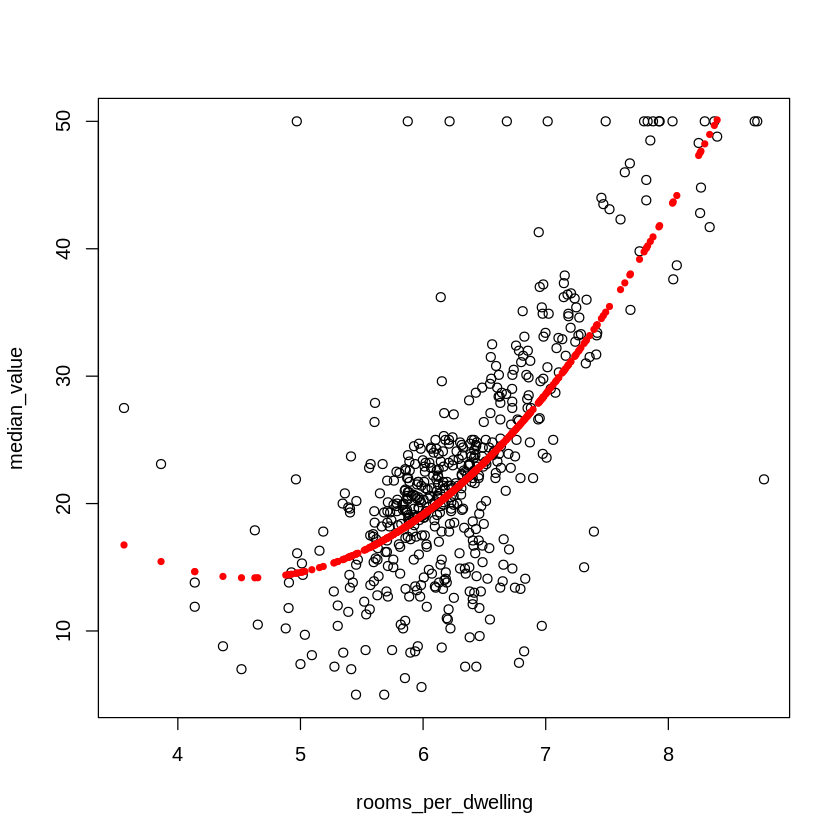

In [55]:
attach(datos_boston)
par(mfrow=c(1,1))
plot(median_value~rooms_per_dwelling, datos_boston)
points(rooms_per_dwelling,fitted(reglin_m3), col="red",pch=20)


Call:
lm(formula = median_value ~ crime_index + urban_ratio + c_river_variable + 
    nox_concentration + rooms_per_dwelling + dwelling_dist + 
    highway_index + tax_ratio + teacher_ratio + racial_index + 
    lower_status, data = datos_boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7889  -2.6711  -0.5923   1.8017  28.0982 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24.324392   5.003718   4.861 1.57e-06 ***
crime_index        -0.003357   0.001433  -2.342 0.019577 *  
urban_ratio         0.010027   0.012644   0.793 0.428143    
c_river_variable    2.949837   0.885042   3.333 0.000924 ***
nox_concentration  -7.015544   3.443627  -2.037 0.042157 *  
rooms_per_dwelling  4.118995   0.418766   9.836  < 2e-16 ***
dwelling_dist      -0.065309   0.012830  -5.090 5.09e-07 ***
highway_index       0.285123   0.067460   4.227 2.83e-05 ***
tax_ratio          -0.009370   0.003484  -2.690 0.007396 ** 
teacher_ratio      -0.9

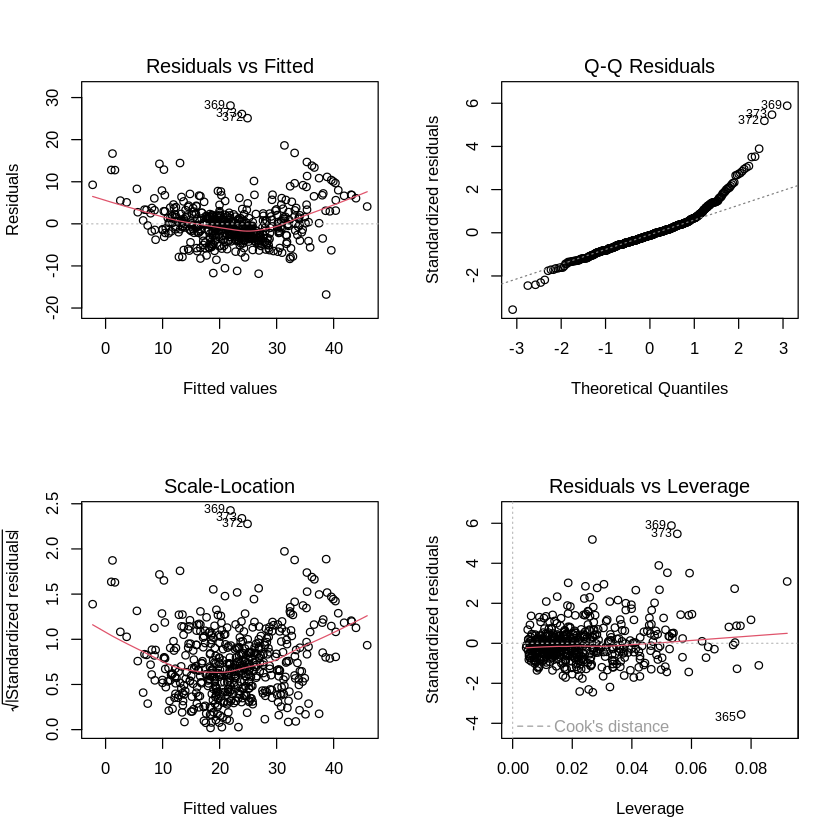

In [60]:
reglin_m4=lm(median_value ~ crime_index + urban_ratio + c_river_variable + nox_concentration + rooms_per_dwelling + dwelling_dist + highway_index + tax_ratio + teacher_ratio + racial_index +
 lower_status, data = datos_boston)
summary(reglin_m4)
par(mfrow=c(2,2))
plot(reglin_m4)


Con este último análisis podemos corroborar las cconclusiones anteriores en cuanto a las variables "lower_status", "rooms_per_dwelling" y "teacher_rati.
Hemos podido ver que estas tres variabes son las que mas afectan al valor medio de la vivienda en boston. Cuantas más habitaciones haya en una vivienda, el precio es más elevado y el ratio de alumno por profesor y el porcentaje de población de clase baja también afecta pero de una manera inversamente proporcional.

A través de los gráficos también podemos reafirmar de una forma más visual nuestra teoría y comprobar que el modelo de regresión lineal se podría aplicar en un estudio real.